# Pima Indians Diabetes Database
https://www.kaggle.com/uciml/pima-indians-diabetes-database

___

In [1]:
# importer les librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importer la base de données
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# vérifier les valeurs null
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# voir la description du dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# voir les informations sur le dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


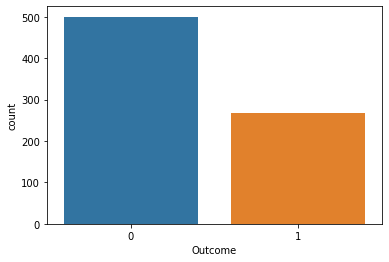

In [7]:
#Visuel sur la variable 'Outcome' (diabétique=1 ; NON diabétiques=0)
sns.countplot(df['Outcome'])

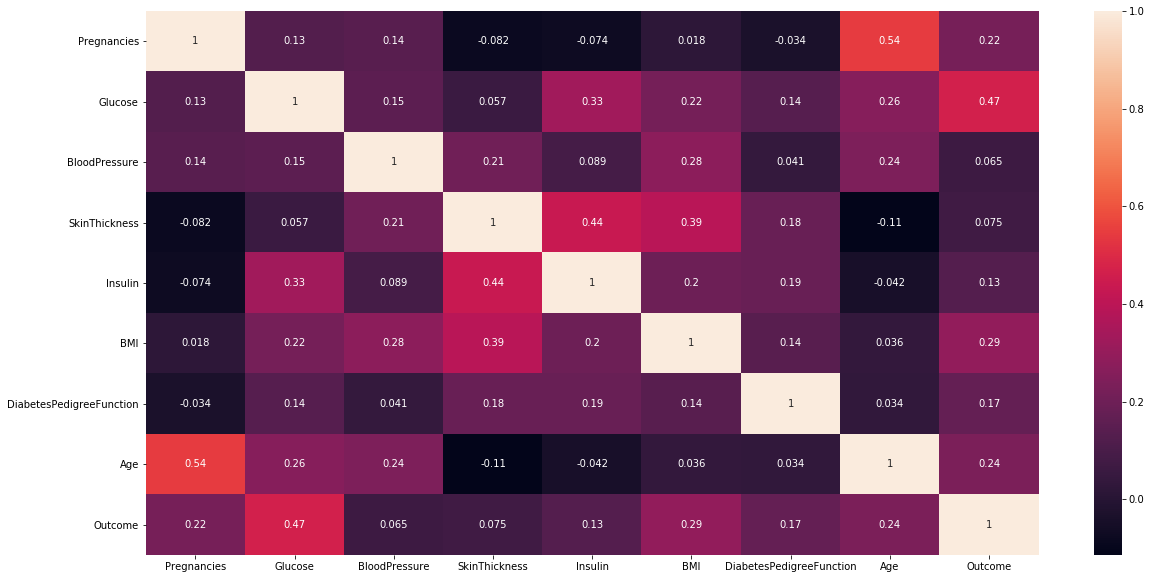

In [8]:
# Création d'une corrélation entre les différents features
plt.figure(figsize=(20,10))
sns.heatmap (df.corr(), annot = True)

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

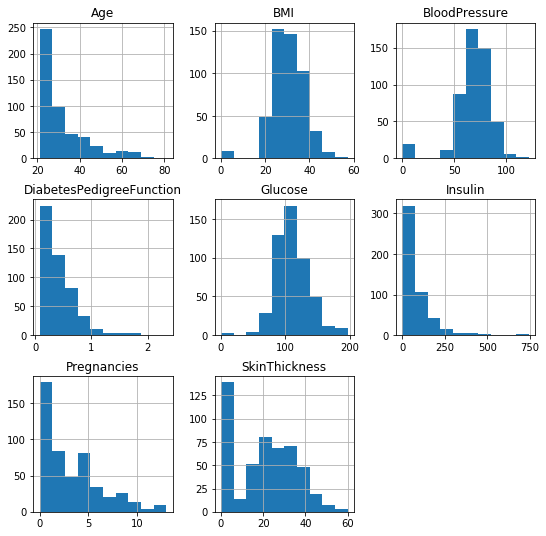

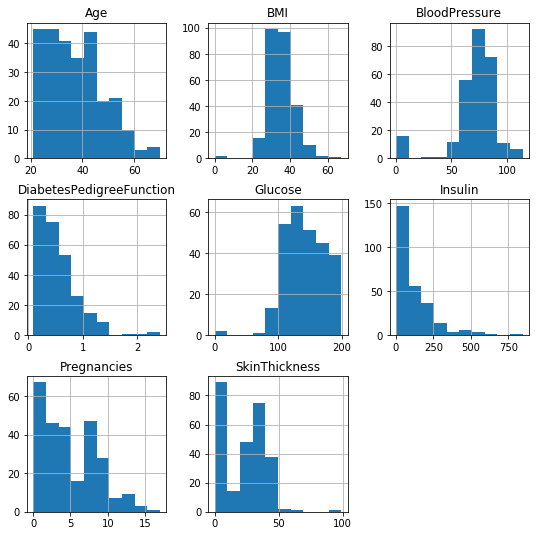

In [9]:
# Visualisation des différentes features d'entrées par rapport à l'Outcome
df.groupby("Outcome").hist(figsize=(9, 9))

In [10]:
#Recherche des valeurs 0 dans les différentes colonnes
count = 0
while (count <= len(df.columns)-2):
    print("Number of {0} in rows " + df.columns[count],
    format(len(df.loc[df.iloc[:,count]== 0]))) 
    count = count + 1
print("Total number of rows: {0}", format(len(df)))   

Number of {0} in rows Pregnancies 111
Number of {0} in rows Glucose 5
Number of {0} in rows BloodPressure 35
Number of {0} in rows SkinThickness 227
Number of {0} in rows Insulin 374
Number of {0} in rows BMI 11
Number of {0} in rows DiabetesPedigreeFunction 0
Number of {0} in rows Age 0
Total number of rows: {0} 768


_____

#### <center>Etude en supprimant les valeurs à 0 et par la médiane</center>

In [11]:
df_clean = df.copy()
df_median = df.copy()
col = ["BMI", "Glucose", "SkinThickness", "Insulin"]
for i in col :
    df_clean = df_clean[df_clean[i] != 0] #non égale 0
    df_median[i]  =  df_median[i].replace(to_replace = 0,  value = df_median[i].median())
df_clean , df_median

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 6              3       78             50             32       88  31.0   
 8              2      197             70             45      543  30.5   
 13             1      189             60             23      846  30.1   
 ..           ...      ...            ...            ...      ...   ...   
 753            0      181             88             44      510  43.3   
 755            1      128             88             39      110  36.5   
 760            2       88             58             26       16  28.4   
 763           10      101             76             48      180  32.9   
 765            5      121             72             23      112  26.2   
 
      DiabetesPedigreeFunction  Age  Outcome  
 3                       0.167   21        0  
 4  

In [406]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


______

#### <center>Visualisation sur df_clean</center>

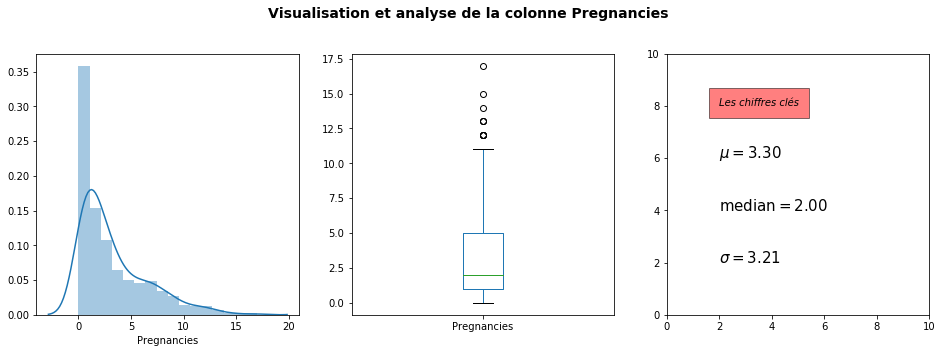

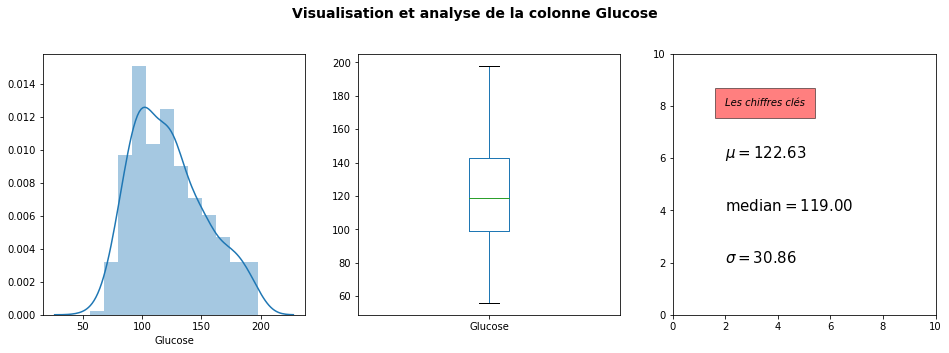

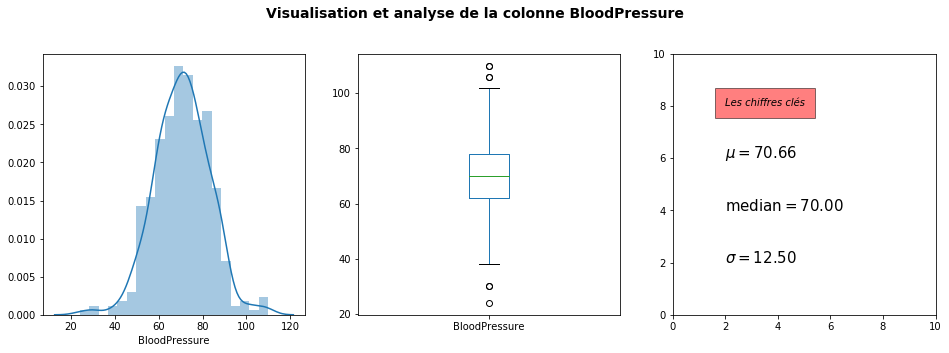

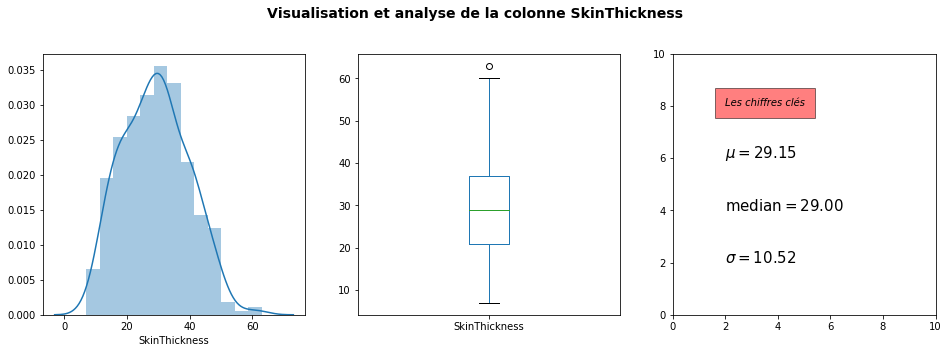

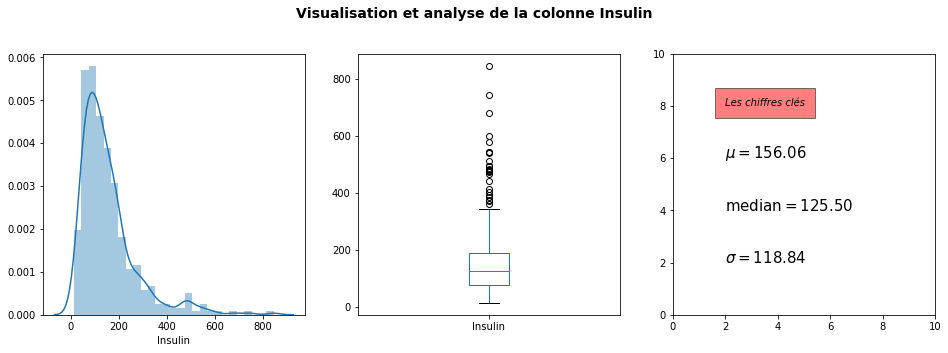

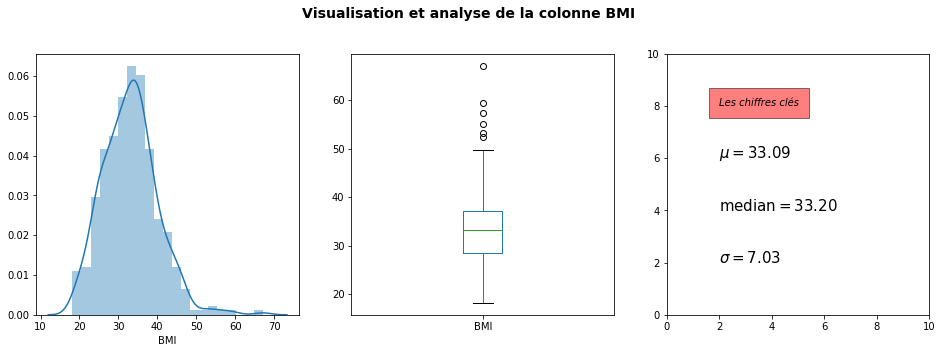

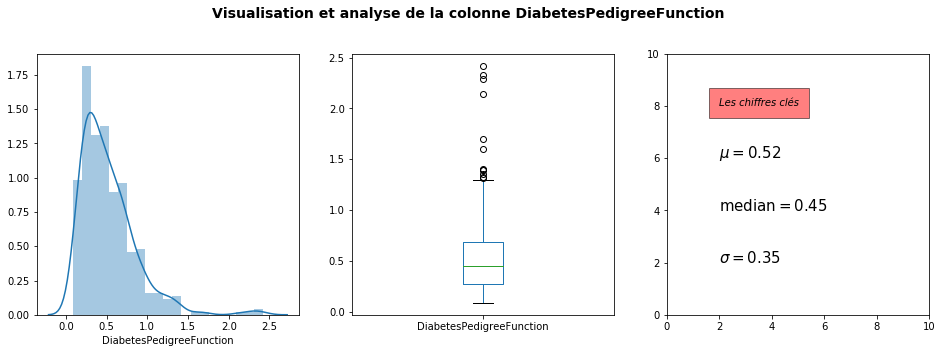

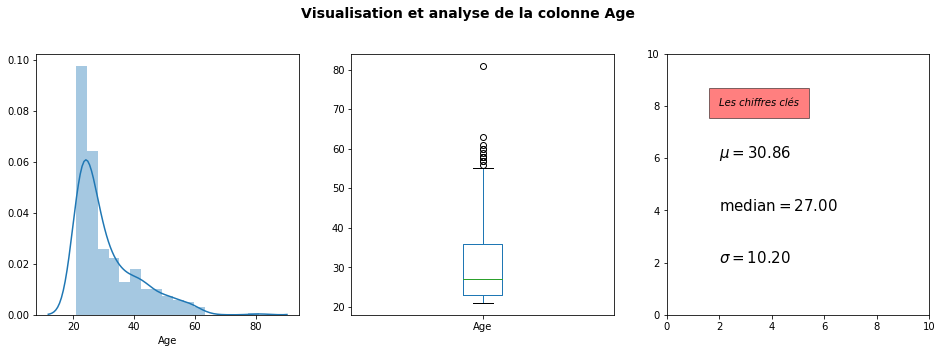

In [419]:
columns = ["Pregnancies",  "Glucose",  "BloodPressure",  "SkinThickness",  "Insulin", "BMI", "DiabetesPedigreeFunction",  "Age"]

for col in df_clean[columns]:   
    
    
    mu = df_clean[col].mean()
    median = np.median(df_clean[col])
    sigma = df_clean[col].std()
    name = df_median[col].name
    
    fig = plt.figure()

    fig.suptitle('Visualisation et analyse de la colonne '+ name , fontsize=14, fontweight='bold')

    ax = fig.add_subplot(133)
    fig.subplots_adjust(top=0.85)
    ax.text(2, 8, 'Les chiffres clés', style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
    
    
    ax.text(2, 6, r'$\mu=%.2f$' % (mu, ), fontsize=15)
    ax.text(2, 4, r'$\mathrm{median}=%.2f$' % (median, ), fontsize=15)
    ax.text(2, 2, r'$\sigma=%.2f$' % (sigma, ), fontsize=15)
    
    ax.axis([0, 10, 0, 10])
    
    
    
    plt.subplot(131), sns.distplot(df_clean[col])
    plt.subplot(132), df_clean[col].plot.box(figsize=(16,5))
    

    
    
    plt.show()

________

#### <center>Visualisation sur df_median</center>

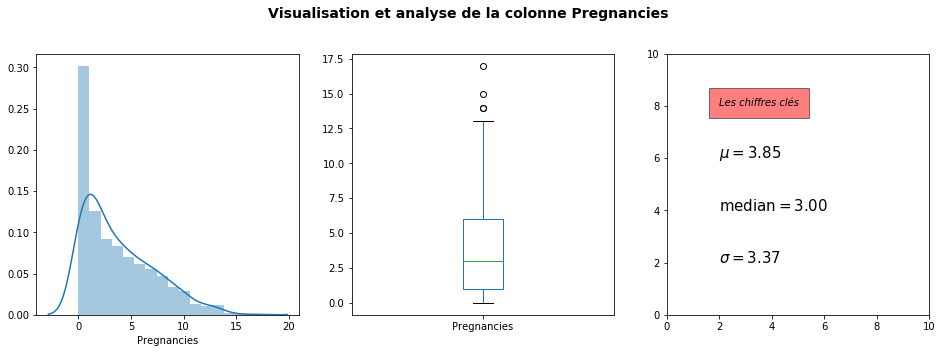

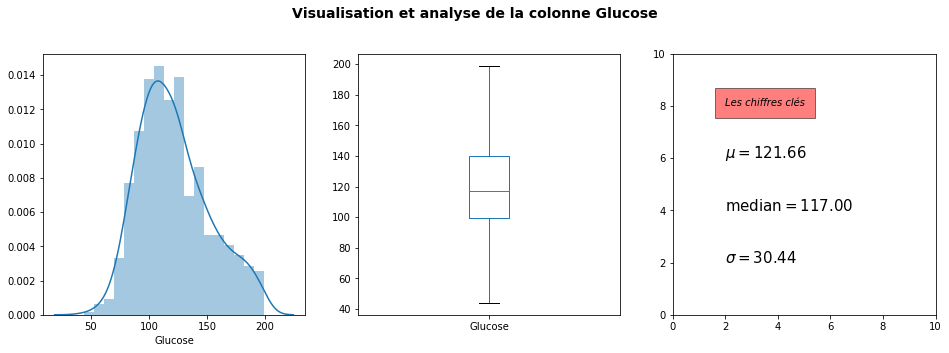

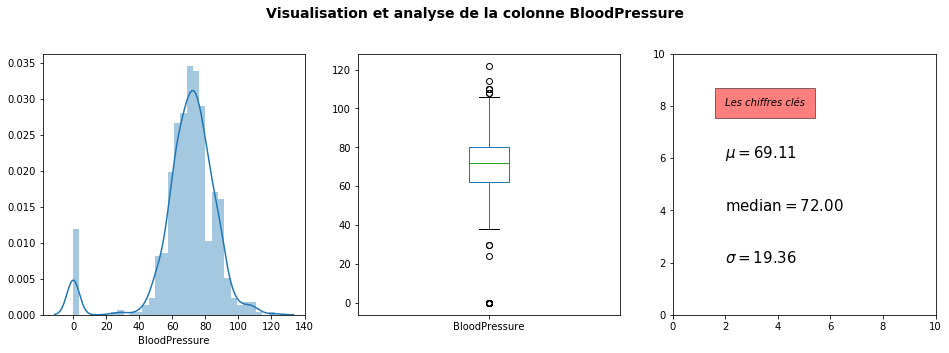

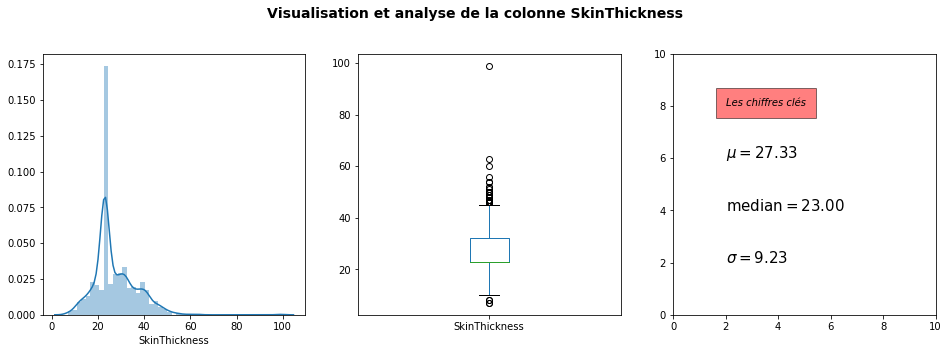

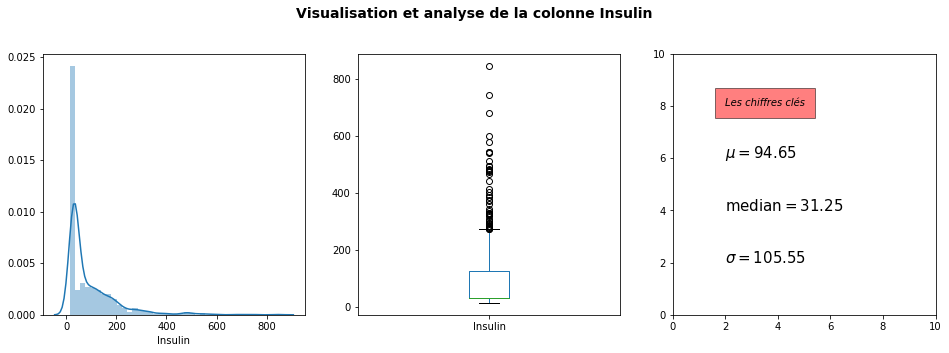

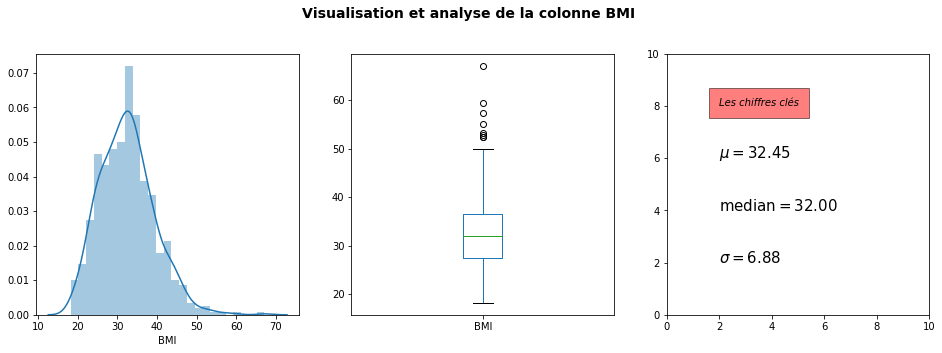

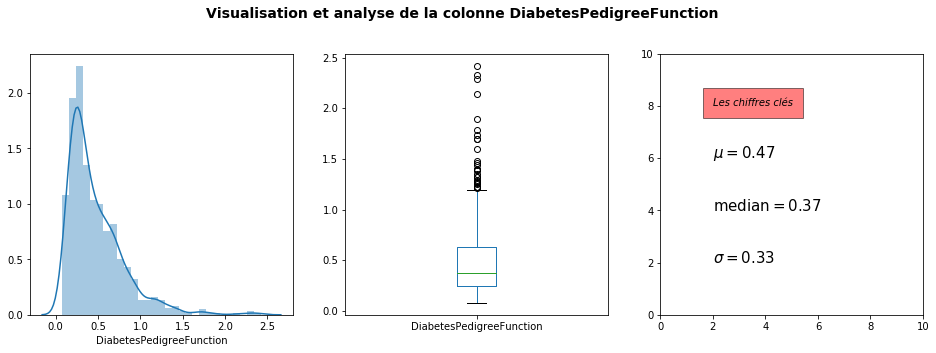

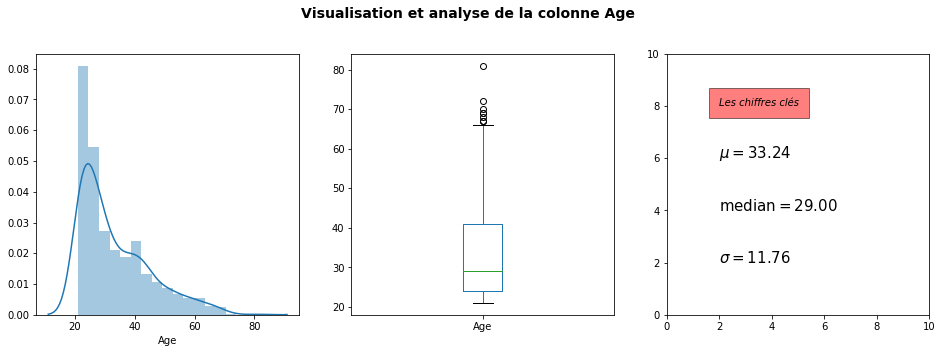

In [414]:

for col in df_median[columns]:   
    
    
    mu = df_median[col].mean()
    median = np.median(df_median[col])
    sigma = df_median[col].std()
    name = df_median[col].name
    fig = plt.figure()
    
    fig.suptitle('Visualisation et analyse de la colonne '+ name , fontsize=14, fontweight='bold')

    ax = fig.add_subplot(133)
    fig.subplots_adjust(top=0.85)
    ax.text(2, 8, 'Les chiffres clés', style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
    
    
    ax.text(2, 6, r'$\mu=%.2f$' % (mu, ), fontsize=15)
    ax.text(2, 4, r'$\mathrm{median}=%.2f$' % (median, ), fontsize=15)
    ax.text(2, 2, r'$\sigma=%.2f$' % (sigma, ), fontsize=15)
    
    ax.axis([0, 10, 0, 10])
    
    
    
    plt.subplot(131), sns.distplot(df_median[col])
    plt.subplot(132), df_median[col].plot.box(figsize=(16,5))
    

    
    
    plt.show()

___________

#### <center>Etude Machine Learning </center>

In [14]:
#Importation des différentes librairies
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [23]:
#Préparer un tableau avec tous les algorithmesmodels
models = []
models.append(('LR', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [17]:
# On renomme la colonne 'Outcome' en 'target'
df['target'] = df['Outcome']

In [18]:
X = df[["BMI", "Glucose", "SkinThickness", "Insulin"]] 
y = df["target"]

In [19]:
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [20]:
names = []
scores = []


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0   LR  0.757576
1  XGB  0.727273
2   RF  0.748918
3   DT  0.675325


In [21]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


  Name     Score
0   LR  0.759108
1  XGB  0.704392
2   RF  0.730468
3   DT  0.666558


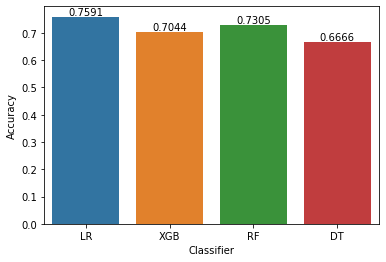

In [24]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

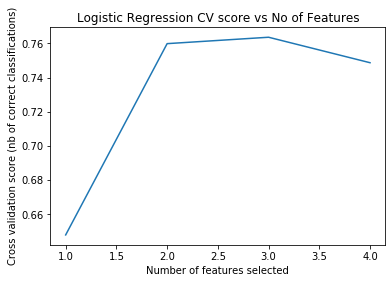

In [25]:
# Un estimateur d'apprentissage supervisé avec une fit méthode qui fournit des informations 
# sur l'importance des caractéristiques soit par un coef_ attribut, soit par un feature_importances_attribut.
from sklearn.feature_selection import RFECV
logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X_train, y_train)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

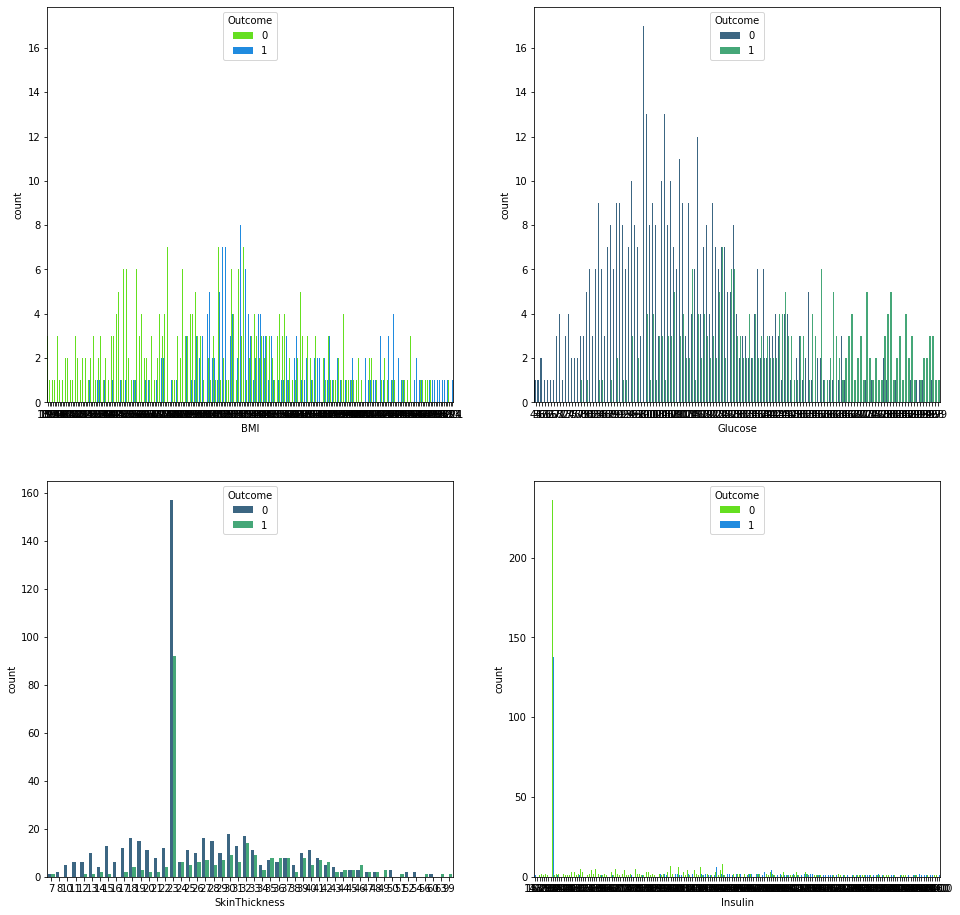

In [26]:

fig ,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=df_median,x='BMI',hue='Outcome',palette='gist_rainbow',ax=ax1)
sns.countplot(data=df_median,x='Glucose',hue='Outcome',palette='viridis',ax=ax2)
sns.countplot(data=df_median,x='SkinThickness',hue='Outcome',palette='viridis',ax=ax3)
sns.countplot(data=df_median,x='Insulin',hue='Outcome',palette='gist_rainbow',ax=ax4)

